In [160]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import itertools
import functools
from matplotlib.animation import FuncAnimation, PillowWriter, MovieWriter 
from IPython import display
from copy import copy, deepcopy
from time import time

In [161]:
def generate_set_a(number_of_points = 100, left = -100, right = 100):
    return np.array([[random.uniform(left, right), random.uniform(left, right)] for _ in range(number_of_points)])


def generate_set_b(number_of_points = 100, O = (0, 0), R = 10):
    points = [[None, None] for _ in range(number_of_points)]
    
    for i in range(number_of_points):
        t = random.uniform(0, 2*np.pi)
        points[i][0] = R * np.cos(t) + O[0]
        points[i][1] = R * np.sin(t) + O[1]
    
    return np.array(points)


def generate_set_c(number_of_points = 100, lower_left_corner = (-10, -10), upper_right_corner = (10, 10)):
    l = lower_left_corner[0]
    r = upper_right_corner[0]
    u = upper_right_corner[1]
    d = lower_left_corner[1]

    points = [[] for _ in range(number_of_points)]
    
    for i in range(number_of_points):
        side = random.randint(1, 4)
        if side == 1:
            x, y = random.uniform(l, r), d
        elif side == 2:
            x, y = l, random.uniform(d, u)
        elif side == 3:
            x, y = random.uniform(l, r), u
        elif side == 4:
            x, y = r, random.uniform(d, u)
        points[i] = [x, y]
    
    return np.array(points)


def generate_set_d(on_axes = 25, on_diagonal = 20, lower_left_corner = (0, 0), a = 10):
    points = [[None, None] for _ in range(2*on_axes + 2*on_diagonal + 4)]
    x0, y0 =  lower_left_corner
    
    for i, element in enumerate(itertools.product([x0, x0 + a], [y0, y0 + a])):
        points[i] = element
    
    for i in range(on_axes):
        points[4 + i] = [random.uniform(x0, x0 + a), y0]
        points[4 + on_axes + i] = [x0, random.uniform(y0, y0 + a)]
        
    p = 4 + on_axes * 2
    
    for i in range(on_diagonal):
        b = y0 - x0
        x = random.uniform(x0, x0 + a)
        y = x + b
        points[p + i] = [x, y]
        
        b = y0 + x0 + a
        x = random.uniform(x0, x0 + a)
        y = -x + b
        points[p + on_diagonal + i] = [x, y]
            
    return np.array(points)


def generate_all_sets():
    return [generate_set_a(), generate_set_b(),  generate_set_c(),  generate_set_d()]

def plot(points):
    plt.scatter(points[:,0], points[:, 1], s=10)

In [162]:
set_of_points = generate_all_sets()

### Zestaw 1.

<IPython.core.display.Javascript object>


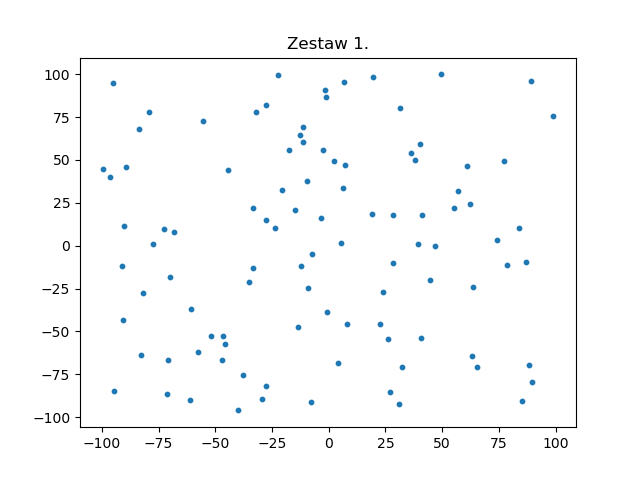

In [165]:
%matplotlib notebook
plt.title('Zestaw 1.')
plot(set_of_points[0])

### Zestaw 2.

<IPython.core.display.Javascript object>


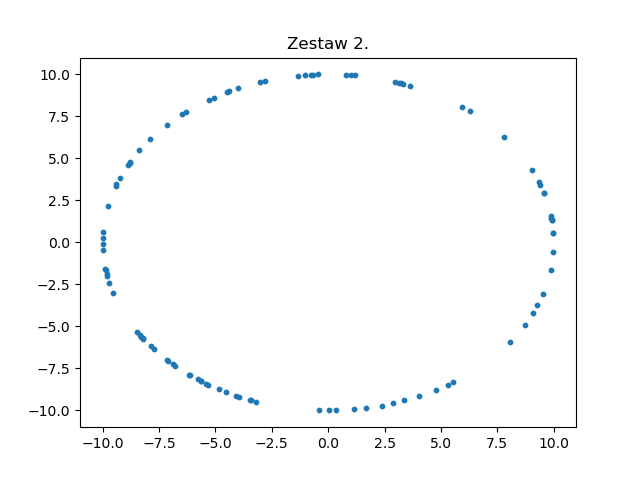

In [166]:
%matplotlib notebook
plt.title('Zestaw 2.')
plot(set_of_points[1])

### Zestaw 3.

<IPython.core.display.Javascript object>


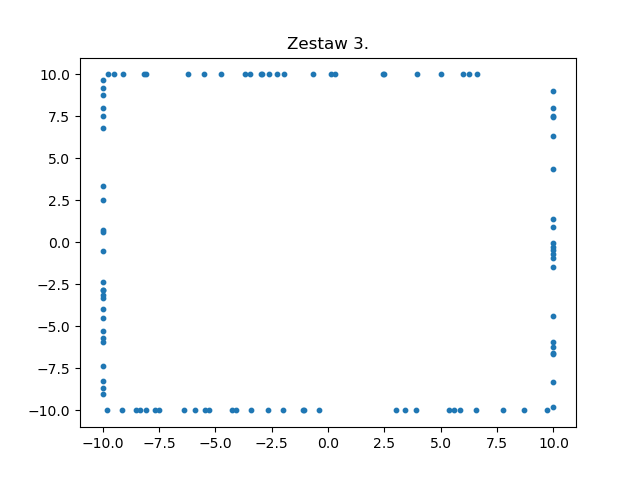

In [167]:
%matplotlib notebook
plt.title('Zestaw 3.')
plot(set_of_points[2])

### Zestaw.4

<IPython.core.display.Javascript object>


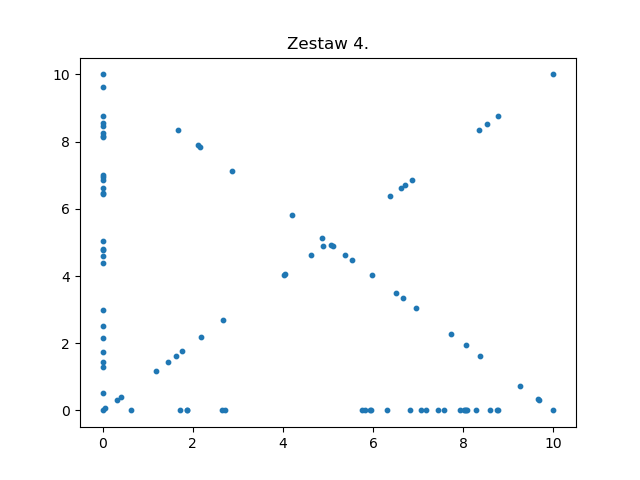

In [168]:
%matplotlib notebook
plt.title('Zestaw 4.')
plot(set_of_points[3])

In [170]:
def det3x3(a, b, c):
    return (a[0]*b[1]) + (a[1]*c[0]) + (b[0]*c[1])- (c[0]*b[1]) - (b[0]*a[1]) - (a[0]*c[1])


def orientation(a, b, c, tolerance = 1e-12):
    det = det3x3(a, b, c)
    if abs(det) < tolerance:
        return 0
    elif det < 0:
        return 1
    else:
        return -1
    
    
def dist(a, b):
        return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**.5         

    
def sort_by_polar_angle(points, p0):  
    def compare(p1, p2):
        d = orientation(p0, p1, p2)
        if d != 0:
            return d
        else:
            if dist(p0, p1) > dist(p0, p2):
                return 1
            else:
                return -1

    presorted_points = sorted(points, key=functools.cmp_to_key(compare))
    
    to_remove = set()
    for i in range(1, len(presorted_points)):
        if orientation(p0, presorted_points[i-1],presorted_points[i]) == 0:
            to_remove.add(i - 1)
    
    sorted_points = [presorted_points[i] for i in range(len(presorted_points)) if i not in to_remove]
    

    return sorted_points

def graham_scan(points, visualization = True):
    start = time()
    
    idx, p0 = min(enumerate(points), key=lambda p:(p[1][1], p[1][0]))
#     print(p0, points[0], points[idx])
    p0 = copy(p0)
    tmp = copy(points[0])
    points[0] = copy(points[idx])
    points[idx] = tmp
#     print(p0, points[0], points[idx])



    sorted_points = sort_by_polar_angle(points[1:], p0)
    
    
    
    stack = []
    stack.append(copy(p0))
    stack.append(copy(sorted_points[0]))
    stack.append(copy(sorted_points[1]))
    
    intermediate_steps = []
    if visualization: intermediate_steps = [np.array(copy(stack))]
    
    m = len(sorted_points)
        
    for i in range(2, m):
        while len(stack) >= 2 and orientation(stack[-2], stack[-1], sorted_points[i]) != -1:
            stack.pop()
            if visualization: intermediate_steps.append(np.array(copy(stack)))
        stack.append(copy(sorted_points[i]))
        if visualization: intermediate_steps.append(np.array(copy(stack)))
    
    end = time()

    return np.array(stack), intermediate_steps, end - start

def compare(p0, p1, p2):
    d = orientation(p0, p1, p2)
    if d != 0:
        return d
    else:
        if dist(p0, p1) > dist(p0, p2):
            return -1
        else:
            return 1

def jarvis_march(points, visualization = True ):
    start = time()
    
    idx_prev, p0 = min(enumerate(points), key=lambda p:(p[1][1], p[1][0]))

    
    stack = [p0]
    intermediate_steps = []
    if visualization: intermediate_steps = [copy(np.array(stack))]
    m = len(points)

    
    while True:
        p1, idx_p1 = points[0], 0
        for i in range(m):
            if i == idx_prev:
                continue
            cmp = compare(stack[-1], p1, points[i])
            if cmp == 1:
                if visualization: intermediate_steps.append(copy(np.array(stack+[p1])))
                p1, idx_p1 = points[i], i
        idx_prev = idx_p1
        
        if p1[0] == p0[0] and p1[1] == p0[1]:
            break
            
        stack.append(p1)
        if visualization: intermediate_steps.append(copy(np.array(stack)))
    
    end = time()
    
    return np.array(stack), intermediate_steps, end - start

def plot_hull(hull):
    plt.plot(hull[:,0], hull[:,1], c='r', marker='o')
    plt.plot([hull[0][0], hull[-1][0]], [hull[0][1], hull[-1][1]], c='r', marker='o')
    print('Liczba punktów otoczki:', len(hull))

In [171]:
def visualize(points, steps):
    
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    
    ax.scatter(points[:,0], points[:,1])

    def update(i):
        ax.clear()
        ax.scatter(points[:,0], points[:,1])
        label = 'step {0}'.format(i + 1)
        ax.plot(steps[i][:, 0], steps[i][:, 1], 'ro-')
        ax.plot(steps[i][-1, 0], steps[i][-1, 1], 'go-')

        ax.set_xlabel(label)

    return FuncAnimation(fig, update, repeat=True, frames=np.arange(0, len(steps)), interval=500)

def hull_to_file(hull, name):
    with open(name+'.txt', 'w') as file:
        file.write('\n'.join(str(x)+','+str(y) for x, y in hull))

### Algorytm Grahama

In [173]:
record_g = [graham_scan(p) for p in set_of_points]

#### Zestaw 1.

<IPython.core.display.Javascript object>


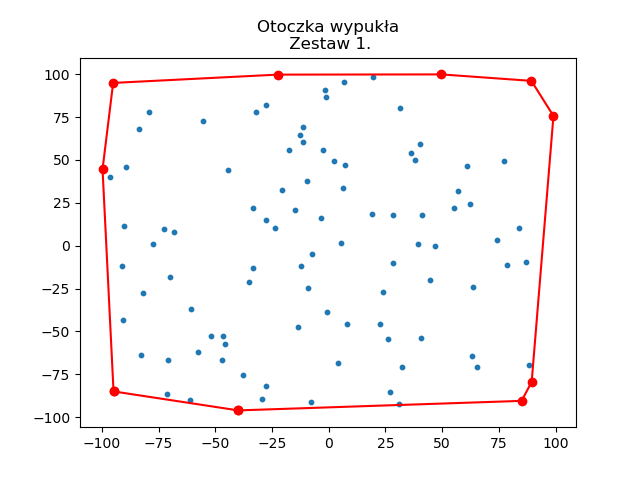

Liczba punktów otoczki: 10
Liczba wszystkich punktów: 100


<IPython.core.display.Javascript object>


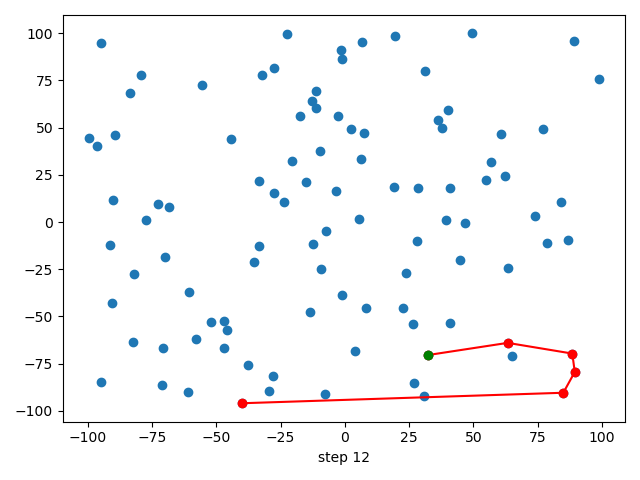

In [174]:
%matplotlib notebook
i = 0
hull, steps, t = record_g[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
print('Liczba wszystkich punktów:', len(set_of_points[i]))
visualize(set_of_points[i], steps)

#### Zestaw 2.

<IPython.core.display.Javascript object>


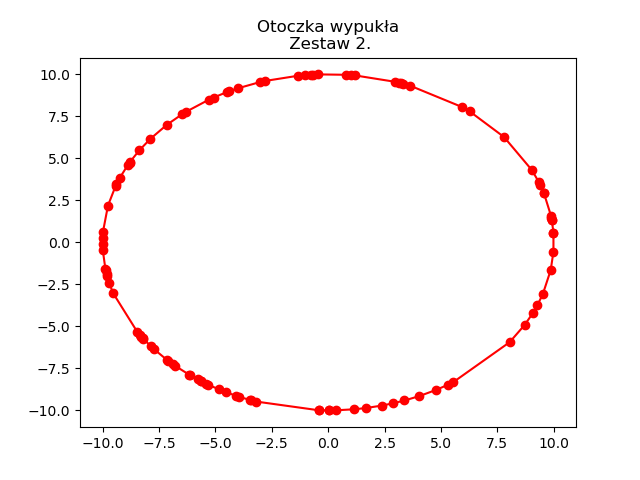

Liczba punktów otoczki: 100
Liczba wszystkich punktów: 100


<IPython.core.display.Javascript object>


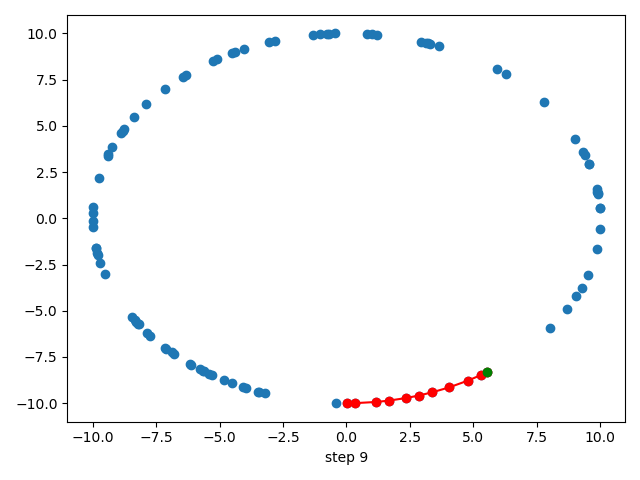

In [175]:
%matplotlib notebook
i = 1
hull, steps, t = record_g[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
print('Liczba wszystkich punktów:', len(set_of_points[i]))
visualize(set_of_points[i], steps)

#### Zestaw 3.

<IPython.core.display.Javascript object>


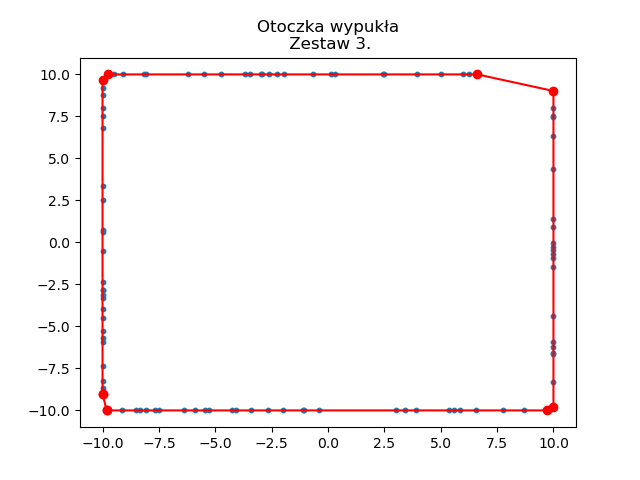

Liczba punktów otoczki: 8
Liczba wszystkich punktów: 100


<IPython.core.display.Javascript object>


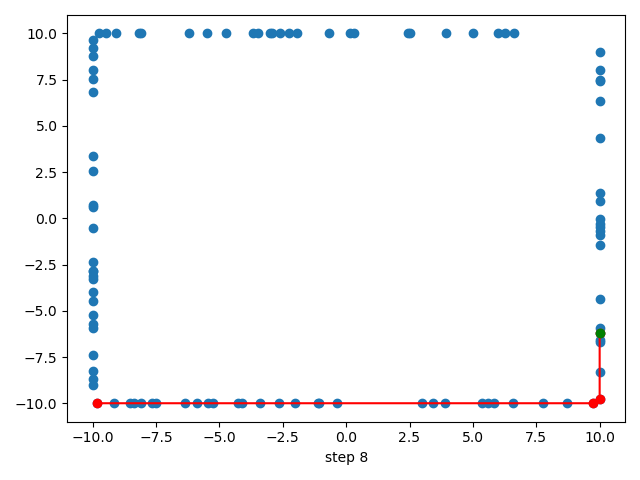

In [176]:
%matplotlib notebook
i = 2
hull, steps, t = record_g[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
print('Liczba wszystkich punktów:', len(set_of_points[i]))
visualize(set_of_points[i], steps)

#### Zestaw 4.

<IPython.core.display.Javascript object>


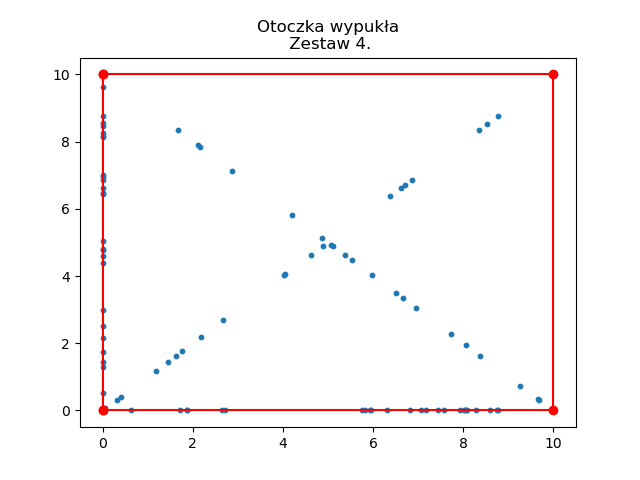

Liczba punktów otoczki: 4
Liczba wszystkich punktów: 94


<IPython.core.display.Javascript object>


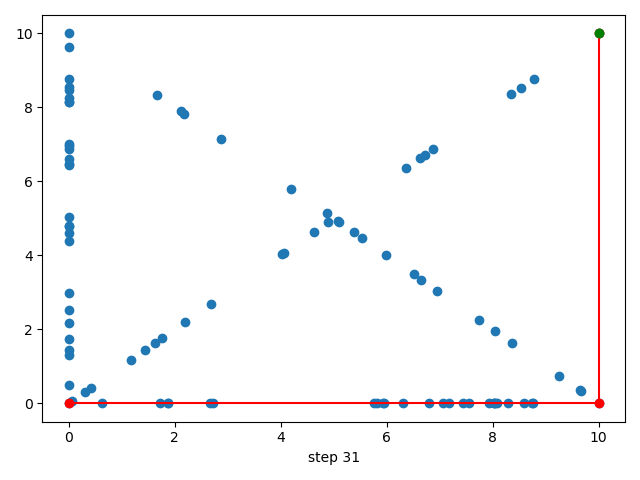

In [177]:
%matplotlib notebook
i = 3
hull, steps, t = record_g[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
print('Liczba wszystkich punktów:', len(set_of_points[i]))
visualize(set_of_points[i], steps)

### Algorytm Jarvisa

In [179]:
record_j = [jarvis_march(p) for p in set_of_points]

#### Zestaw 1.

<IPython.core.display.Javascript object>


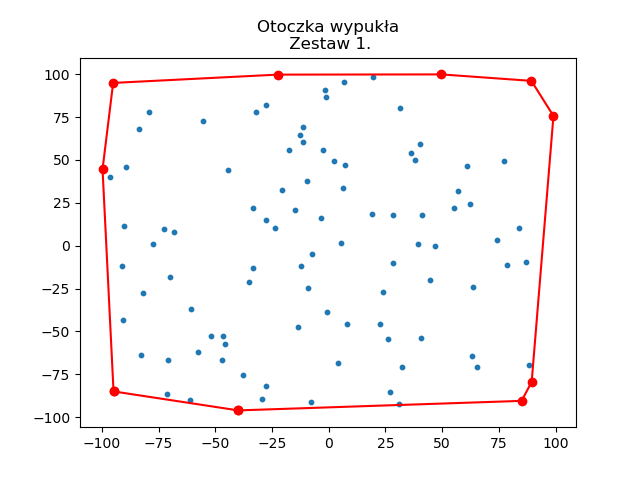

Liczba punktów otoczki: 10


<IPython.core.display.Javascript object>


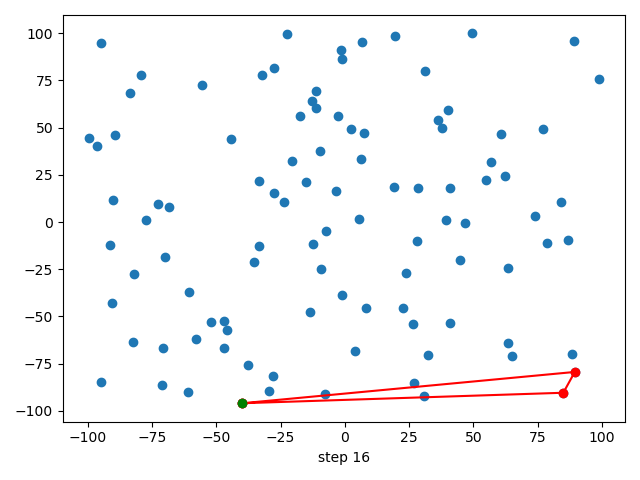

In [184]:
%matplotlib notebook
i = 0
hull, steps, t = record_j[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
visualize(set_of_points[i], steps)

#### Zestaw 2,

<IPython.core.display.Javascript object>


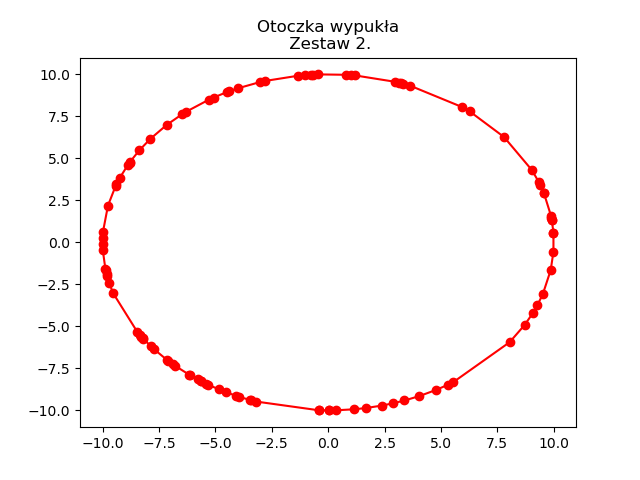

Liczba punktów otoczki: 100


<IPython.core.display.Javascript object>


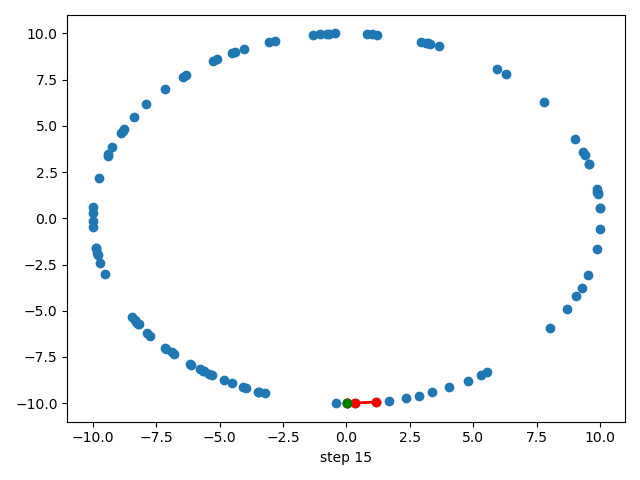

In [185]:
%matplotlib notebook
i = 1
hull, steps, t = record_j[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
visualize(set_of_points[i], steps)

#### Zestaw 3.

<IPython.core.display.Javascript object>


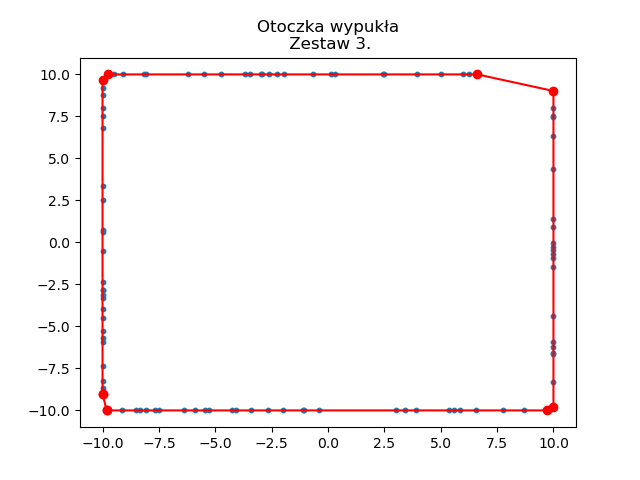

Liczba punktów otoczki: 8


<IPython.core.display.Javascript object>


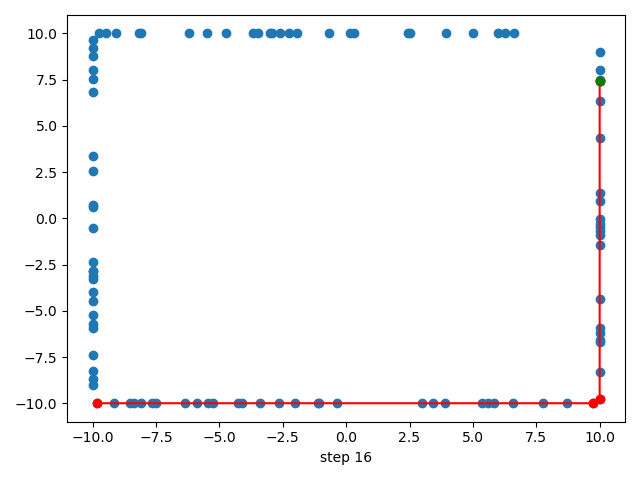

In [186]:
%matplotlib notebook
i = 2
hull, steps, t = record_j[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
visualize(set_of_points[i], steps)

#### Zestaw 4.

<IPython.core.display.Javascript object>


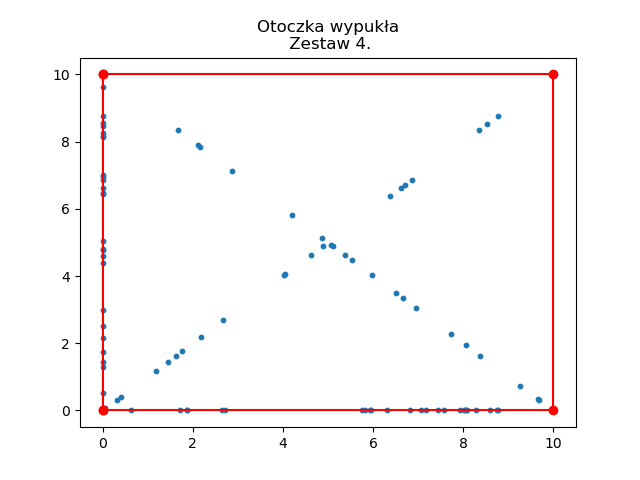

Liczba punktów otoczki: 4


<IPython.core.display.Javascript object>


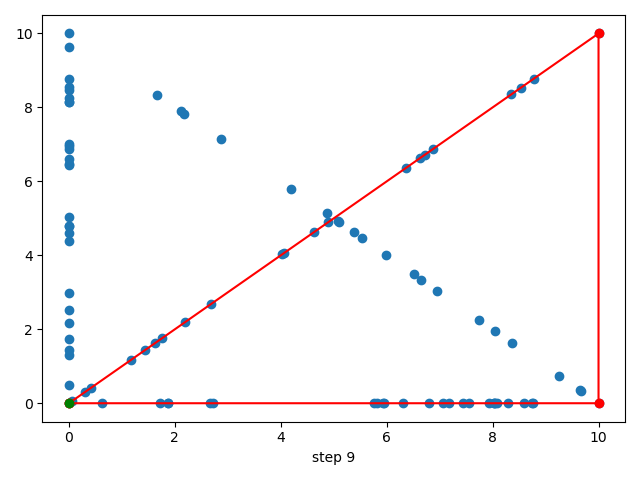

In [187]:
%matplotlib notebook
i = 3
hull, steps, t = record_j[i]
plot(set_of_points[i])
plt.title(f'Otoczka wypukła\n Zestaw {i + 1}.')
plot_hull(hull)
visualize(set_of_points[i], steps)

In [191]:
def time_diff(points_by_num, interrupt = False):
    r_graham = [graham_scan(points, visualization=False)[2] for points in points_by_num]
    if interrupt:
        points = copy(points_by_num[:4])
    r_jarvis = [jarvis_march(points, visualization=False)[2] for points in points_by_num[:]]
    if interrupt:
        r_jarvis =+ [None for _ in range(4)]
    
    return [r_graham, r_jarvis]
    
def plot_time_diff(data, x_data):
    graham_data, jarvis_data = data
    
    plt.style.use('ggplot')
    plt.xlabel('Liczba punktów')
    plt.ylabel('Czas wykonania algorytmu [s]')


    plt.plot(x_data, graham_data, label='Graham')
    plt.plot(x_data, jarvis_data, label='Jarvis')
    plt.legend()
    
def create_table_time_diff(data, num_of_points):
    pd_data = [[None for _ in range(len(num_of_points))] for _ in range(8)]
    k = 0
    for set_ in data:
        pd_data[k] = set_[0]
        k+=1
        pd_data[k] = set_[1]
        k+=1


        
    pd_data = np.array(pd_data)
    print(pd_data)
    
    sets = [f'Zestaw {i + 1}.' for i in range(4)]
    df = pd.DataFrame(pd_data, index=pd.MultiIndex.from_product([sets, ['Grahama', 'Jarvisa']], names=['Zestaw', 'Algorytm']),
                     columns=pd.Index(num_of_points))
    
    display.display(df)
    
    html = df.to_html()
  
    # zapisuję tabelę w pliku z rozszerzeniem .html
    text_file = open("index.html", "w")
    text_file.write(html)
    text_file.close()

In [192]:
time_data = [[] for _ in range(4)]
num_of_points = [100, 1000, 2500, 5000, 7500, 10000, 15000, 20000]

<IPython.core.display.Javascript object>


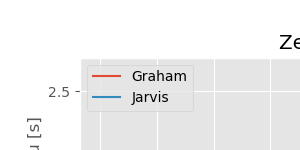

In [193]:
%matplotlib notebook
plt.style.use('ggplot')
points_by_num = [generate_set_a(num) for num in num_of_points]
time_data[0] = time_diff(points_by_num)
plt.title('Zestaw 1.')
plot_time_diff(time_data[0], num_of_points)

<IPython.core.display.Javascript object>


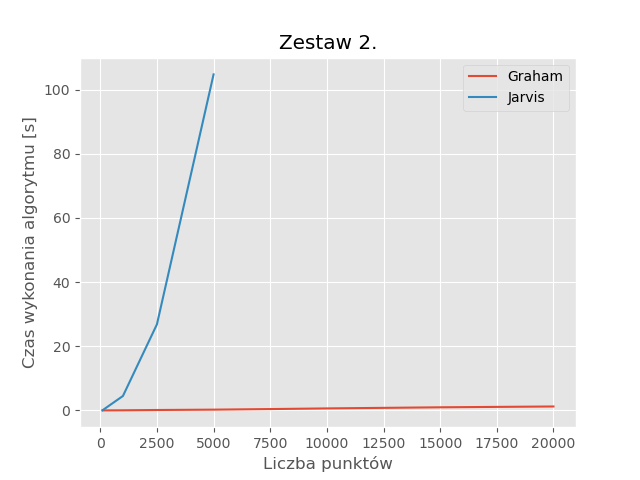

In [152]:
%matplotlib notebook
plt.style.use('ggplot')
points_by_num = [generate_set_b(num) for num in num_of_points]
time_data[1] = time_diff(points_by_num)
plt.title('Zestaw 2.')
plot_time_diff(time_data[1], num_of_points)

<IPython.core.display.Javascript object>


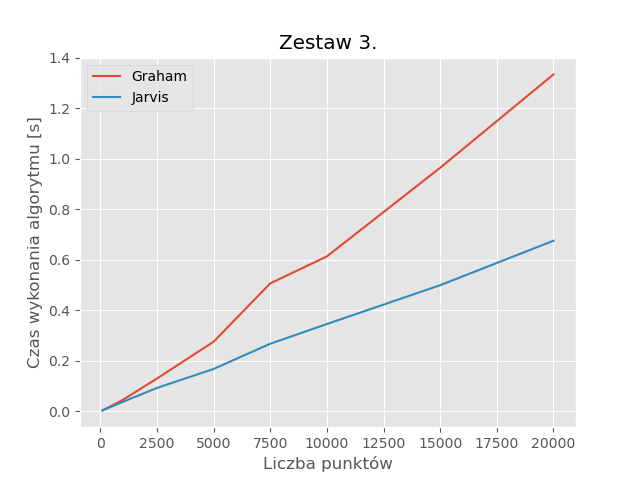

In [112]:
%matplotlib notebook
points_by_num = [generate_set_c(num) for num in num_of_points]
time_data[2] = time_diff(points_by_num)
plt.title('Zestaw 3.')
plot_time_diff(time_data[2], num_of_points)

<IPython.core.display.Javascript object>


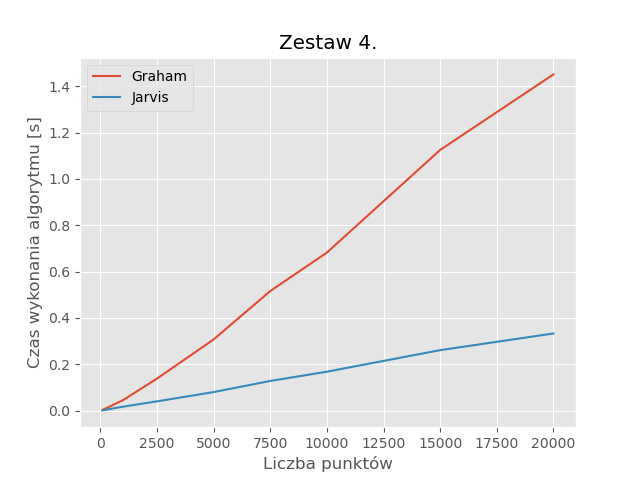

In [113]:
%matplotlib notebook
points_by_num = [generate_set_d(num//4, num//4) for num in num_of_points]
time_data[3] = time_diff(points_by_num)
plt.title('Zestaw 4.')
plot_time_diff(time_data[3], num_of_points)

In [158]:
create_table_time_diff(time_data, num_of_points)

[['0.00299835205078125' '0.042999267578125' '0.1259746551513672'
  '0.26200389862060547' '0.41802310943603516' '0.5979783535003662'
  '0.8899953365325928' '1.1860251426696777']
 ['0.004999637603759766' '0.050000667572021484' '0.20197296142578125'
  '0.4029998779296875' '0.6430039405822754' '0.935999870300293'
  '1.390021562576294' '1.8960001468658447']
 ['0.0' '0.031215190887451172' '0.12499833106994629'
  '0.23443031311035156' '0.41587042808532715' '0.6179792881011963'
  '0.9656991958618164' '1.2220866680145264']
 ['0.046857595443725586' '4.4951558113098145' '26.830878257751465'
  '104.75033211708069' '-' '-' '-' '-']
 ['0.003975391387939453' '0.04599809646606445' '0.13002586364746094'
  '0.27597832679748535' '0.5069992542266846' '0.6139979362487793'
  '0.965003252029419' '1.3349957466125488']
 ['0.003996372222900391' '0.03799891471862793' '0.09299778938293457'
  '0.16802024841308594' '0.2680027484893799' '0.34599971771240234'
  '0.5000002384185791' '0.6759731769561768']
 ['0.00299048

100                   1000   \
Zestaw    Algorytm                                                
Zestaw 1. Grahama     0.00299835205078125     0.042999267578125   
          Jarvisa    0.004999637603759766  0.050000667572021484   
Zestaw 2. Grahama                     0.0  0.031215190887451172   
          Jarvisa    0.046857595443725586    4.4951558113098145   
Zestaw 3. Grahama    0.003975391387939453   0.04599809646606445   
          Jarvisa    0.003996372222900391   0.03799891471862793   
Zestaw 4. Grahama   0.0029904842376708984   0.04500269889831543   
          Jarvisa   0.0009996891021728516  0.016998767852783203   

                                  2500                 5000   \
Zestaw    Algorytm                                             
Zestaw 1. Grahama    0.1259746551513672  0.26200389862060547   
          Jarvisa   0.20197296142578125   0.4029998779296875   
Zestaw 2. Grahama   0.12499833106994629  0.23443031311035156   
          Jarvisa    26.830878257751465   104.75033211708069   
Zestaw 3. Grahama   0.13002586364746094  0.27597832679748535   
          Jarvisa   0.09299778938293457  0.16802024841308594   
Zestaw 4. Grahama    0.1380019187927246  0.30699729919433594   
          Jarvisa   0.03999972343444824  0.08002710342407227   

                                  7500                 10000  \
Zestaw    Algorytm                                             
Zestaw 1. Grahama   0.41802310943603516   0.5979783535003662   
          Jarvisa    0.6430039405822754    0.935999870300293   
Zestaw 2. Grahama   0.41587042808532715   0.6179792881011963   
          Jarvisa                     -                    -   
Zestaw 3. Grahama    0.5069992542266846   0.6139979362487793   
          Jarvisa    0.2680027484893799  0.34599971771240234   
Zestaw 4. Grahama    0.5160012245178223   0.6819977760314941   
          Jarvisa    0.1279771327972412  0.16800236701965332   

                                 15000                20000  
Zestaw    Algorytm                                           
Zestaw 1. Grahama   0.8899953365325928   1.1860251426696777  
          Jarvisa    1.390021562576294   1.8960001468658447  
Zestaw 2. Grahama   0.9656991958618164   1.2220866680145264  
          Jarvisa                    -                    -  
Zestaw 3. Grahama    0.965003252029419   1.3349957466125488  
          Jarvisa   0.5000002384185791   0.6759731769561768  
Zestaw 4. Grahama   1.1250061988830566   1.4509937763214111  
          Jarvisa   0.2610204219818115  0.33297300338745117